INICIALIZACIÓN DE LIBRERÍAS

In [ ]:
import  cv2
import  numpy as np
import  matplotlib.pyplot as plt
from    matplotlib.colors import LogNorm
from    scipy.fftpack import fft2,ifft2,fftshift,ifftshift
from    scipy.ndimage import gaussian_filter
from    scipy.signal import fftconvolve

IMAGEN

In [ ]:
img = cv2.imread('img.jpeg',0)
print(img.shape)

plt.imshow(img,cmap='gray')

### 1. FILTROS DE SUAVIZADO EN EL ESPACIO 
    1.1 PROMEDIO
    1.2 MEDIANA
    1.3 GAUSSIANO

### 2. FILTROS DE DETECCION DE BORDES EN EL ESPACIO 
    2.1 SOBEL: más usado
    2.2 PREWITT
    2.3 ROBERTS

 ### 3. FILTROS DE SUAVIZADO DE BORDES EN LA FRECUENCIA 
    3.1 PASA BAJO
        3.1.1 IDEAL
        3.1.2 BUTTERWORTH
        3.1.3 GAUSSIAN
    3.2 PASA ALTO
        3.2.1 IDEAL
        3.2.2 BUTTERWORTH
        3.2.3 GAUSSIAN

In [ ]:
tamano = 15

# -----------
# 1.1 Promedio
# -----------

tipo = 1

if tipo == 1:
    filtro_media = cv2.blur(img,(tamano,tamano))

elif tipo == 2:
    kernel_media = np.ones((tamano,tamano))*tamano**-2
    filtro_media = cv2.filter2D(img,-1,kernel_media)

# plt.imshow(filtro_media,cmap='gray')
# plt.show()

# -----------
# 1.2 MEDIANA
# -----------

median_blur = cv2.medianBlur(img,tamano)
# plt.imshow(median_blur,cmap='gray')
# plt.show()

# -----------
# 1.3 GAUSSIANA
# -----------
dev = 8
filtro_gauss = cv2.GaussianBlur(img,(tamano,tamano),dev)
# plt.imshow(filtro_gauss,cmap='gray')
# plt.show()

plt.figure(figsize=(20,15))

plt.subplot(232), plt.imshow(img,cmap='gray'), plt.title("Imagen original")
plt.subplot(234), plt.imshow(filtro_media,cmap='gray'), plt.title("Promedio")
plt.subplot(235), plt.imshow(median_blur,cmap='gray'), plt.title("Mediana")
plt.subplot(236), plt.imshow(filtro_gauss,cmap='gray'), plt.title("Gaussiana")

plt.show()


In [ ]:
# -----------
# 2.1 Sobel
# -----------
add_gauss = 1
if add_gauss == 1:
    img_sobel = cv2.GaussianBlur(img,(15,15),8)
    sobel_filter = cv2.Sobel(img_sobel, cv2.CV_64F, 1, 1, ksize=5)
else:
    sobel_filter = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)
    
sobel_filter = cv2.convertScaleAbs(sobel_filter)

# plt.imshow(sobel_filter, cmap = 'gray')
# plt.show()

# -----------
# 2.2 Prewitt
# -----------

Prewitt_kernel_X = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
Prewitt_kernel_Y = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

Prewitt_img_X = cv2.filter2D(img,-1,Prewitt_kernel_X)
Prewitt_img_Y = cv2.filter2D(img,-1,Prewitt_kernel_Y)

Prewitt_img_XY = cv2.addWeighted(Prewitt_img_X,0.5,Prewitt_img_Y,0.5,0)
# plt.imshow(Prewitt_img_XY,cmap='gray')
# plt.show()

# -----------
# 2.3 Roberts
# -----------
Roberts_kernel_X = np.array([[0,-1],[1,0]])
Roberts_kernel_Y = np.array([[-1,0],[0,1]])
Roberts_img_X = cv2.filter2D(img,-1,Roberts_kernel_X)
Roberts_img_Y = cv2.filter2D(img,-1,Roberts_kernel_Y)

Roberts_img_XY = cv2.addWeighted(Roberts_img_X,0.5,Roberts_img_Y,0.5,0)
# plt.imshow(Roberts_img_XY,cmap='gray')
# plt.show()

plt.figure(figsize=(20,15))

plt.subplot(232), plt.imshow(img,cmap='gray'), plt.title("Imagen original")
plt.subplot(234), plt.imshow(sobel_filter,cmap='gray'), plt.title("Sobel - mas usado")
plt.subplot(235), plt.imshow(Prewitt_img_XY,cmap='gray'), plt.title("Prewitt")
plt.subplot(236), plt.imshow(Roberts_img_XY,cmap='gray'), plt.title("Roberts")

plt.show()

## EN FRECUENCIA

### CREACION DE FUNCIONES PARA GRAFICOS

In [ ]:
# Graficas los puntos
def surface_plot (matrix, **kwargs):
    # acquire the cartesian coordinate matrices from the matrix
    # x is cols, y is rows
    (x, y) = np.meshgrid(np.arange(matrix.shape[1]), np.arange(matrix.shape[0]))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, matrix, **kwargs)
    return (fig, ax, surf)

# Graficar espectro del programa
def plot_spectrum(X_ft,centered=True):
    # A logarithmic colormap
    if centered:
      X_ftc = fftshift(X_ft)
    else:
      X_ftc = X_ft
    plt.imshow(np.abs(X_ftc), norm=LogNorm(vmin=5))
    plt.colorbar()

In [ ]:
# La imagen original es transformada de ida y de vuelta (sin procesar)

plt.figure(figsize=(30,15))

plt.subplot(231), plt.imshow(img, "gray"), plt.title("Imagen original")

img_ft = fft2(img)
plt.subplot(234), plt.imshow(np.log(1+np.abs(img_ft)), "gray"), plt.title("Espectro")

img_ftc = fftshift(img_ft)
plt.subplot(235), plt.imshow(np.log(1+np.abs(img_ftc)), "gray"), plt.title("Espectro centrado")

img_ft_inv = ifftshift(img_ftc)
plt.subplot(236), plt.imshow(np.log(1+np.abs(img_ft_inv)), "gray"), plt.title("Espectro decentralizado")

img_new = ifft2(img_ft_inv)
# X_new = ifft2(X_ftc)
plt.subplot(233), plt.imshow(np.abs(img_new), "gray"), plt.title("Imagen procesada")

plt.subplot(232),plot_spectrum(img_ft), plt.title('Espectro centrado')

plt.show()

### CREACION DE FUNCIONES DE FILTROS

In [ ]:
# FILTROS DE FRECUENCIA
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# IDEAL
def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

# BUTTERWORTH
def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

# Gaussian
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

### FILTROS DE FILTROS EN FRECUENCIA

In [ ]:
Do=30

# IDEAL
I_LP = idealFilterLP(Do,img.shape)
I_HP = idealFilterHP(Do,img.shape)

# BUTTERWORTH
n = 10
BW_LP = butterworthLP(Do,img.shape,n)
BW_HP = butterworthHP(Do,img.shape,n)

# GAUSS
G_LP = gaussianLP(Do,img.shape)
G_HP = gaussianHP(Do,img.shape)


In [ ]:
plt.figure(figsize=(25,10))

# IDEAL
plt.subplot(161),plt.imshow(I_LP, "gray"), plt.title("Ideal Low Pass Filter")
plt.subplot(162),plt.imshow(I_HP, "gray"), plt.title("Ideal High Pass Filter")

plt.subplot(163),plt.imshow(BW_LP, "gray"), plt.title("Butterworth Low Pass Filter (n=10)")
plt.subplot(164),plt.imshow(BW_HP, "gray"), plt.title("Butterworth High Pass Filter (n=10)")

plt.subplot(165),plt.imshow(G_LP, "gray"), plt.title("Gaussian Low Pass Filter")
plt.subplot(166),plt.imshow(G_HP, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

fig = plt.figure(figsize=(25,10))

ax1 = fig.add_subplot(161, projection='3d')
(I_LP_x, I_LP_y) = np.meshgrid(np.arange(I_LP.shape[1]), np.arange(I_LP.shape[0]))
surf = ax1.plot_surface(I_LP_x, I_LP_y, I_LP,cmap=plt.cm.coolwarm)

ax2 = fig.add_subplot(162, projection='3d')
(I_HP_x, I_HP_y) = np.meshgrid(np.arange(I_HP.shape[1]), np.arange(I_HP.shape[0]))
surf = ax2.plot_surface(I_HP_x, I_HP_y, I_HP,cmap=plt.cm.coolwarm)

ax3 = fig.add_subplot(163, projection='3d')
(BW_LP_x, BW_LP_y) = np.meshgrid(np.arange(BW_LP.shape[1]), np.arange(BW_LP.shape[0]))
surf = ax3.plot_surface(BW_LP_x, BW_LP_y, BW_LP,cmap=plt.cm.coolwarm)

ax4 = fig.add_subplot(164, projection='3d')
(BW_HP_x, BW_HP_y) = np.meshgrid(np.arange(BW_HP.shape[1]), np.arange(BW_HP.shape[0]))
surf = ax4.plot_surface(BW_HP_x, BW_HP_y, BW_HP,cmap=plt.cm.coolwarm)

ax5 = fig.add_subplot(165, projection='3d')
(G_LP_x, G_LP_y) = np.meshgrid(np.arange(G_LP.shape[1]), np.arange(G_LP.shape[0]))
surf = ax5.plot_surface(G_LP_x, G_LP_y, G_LP,cmap=plt.cm.coolwarm)

ax6 = fig.add_subplot(166, projection='3d')
(G_HP_x, G_HP_y) = np.meshgrid(np.arange(G_HP.shape[1]), np.arange(G_HP.shape[0]))
surf = ax6.plot_surface(G_HP_x, G_HP_y, G_HP,cmap=plt.cm.coolwarm)

In [ ]:
# 1. Espectro
img_ft = fft2(img) 
# 2. Reordenar espectro
img_ft_c = fftshift(img_ft)


# 3. Multiplicacion
img_I_LP_ft_c = img_ft_c * I_LP
#4. Regresar espectro
img_I_LP_ft = ifftshift(img_I_LP_ft_c)
img_I_LP = ifft2(img_I_LP_ft)

# 3. Multiplicacion
img_I_HP_ft_c = img_ft_c * I_HP
#4. Regresar espectro
img_I_HP_ft = ifftshift(img_I_HP_ft_c)
img_I_HP = ifft2(img_I_HP_ft)


# 3. Multiplicacion
img_BW_LP_ft_c = img_ft_c * BW_LP
#4. Regresar espectro
img_BW_LP_ft = ifftshift(img_BW_LP_ft_c)
img_BW_LP = ifft2(img_BW_LP_ft)

# 3. Multiplicacion
img_BW_HP_ft_c = img_ft_c * BW_HP
#4. Regresar espectro
img_BW_HP_ft = ifftshift(img_BW_HP_ft_c)
img_BW_HP = ifft2(img_BW_HP_ft)


# 3. Multiplicacion
img_G_LP_ft_c = img_ft_c * G_LP
#4. Regresar espectro
img_G_LP_ft = ifftshift(img_G_LP_ft_c)
img_G_LP = ifft2(img_G_LP_ft)

# 3. Multiplicacion
img_G_HP_ft_c = img_ft_c * G_HP
#4. Regresar espectro
img_G_HP_ft = ifftshift(img_G_HP_ft_c)
img_G_HP = ifft2(img_G_HP_ft)


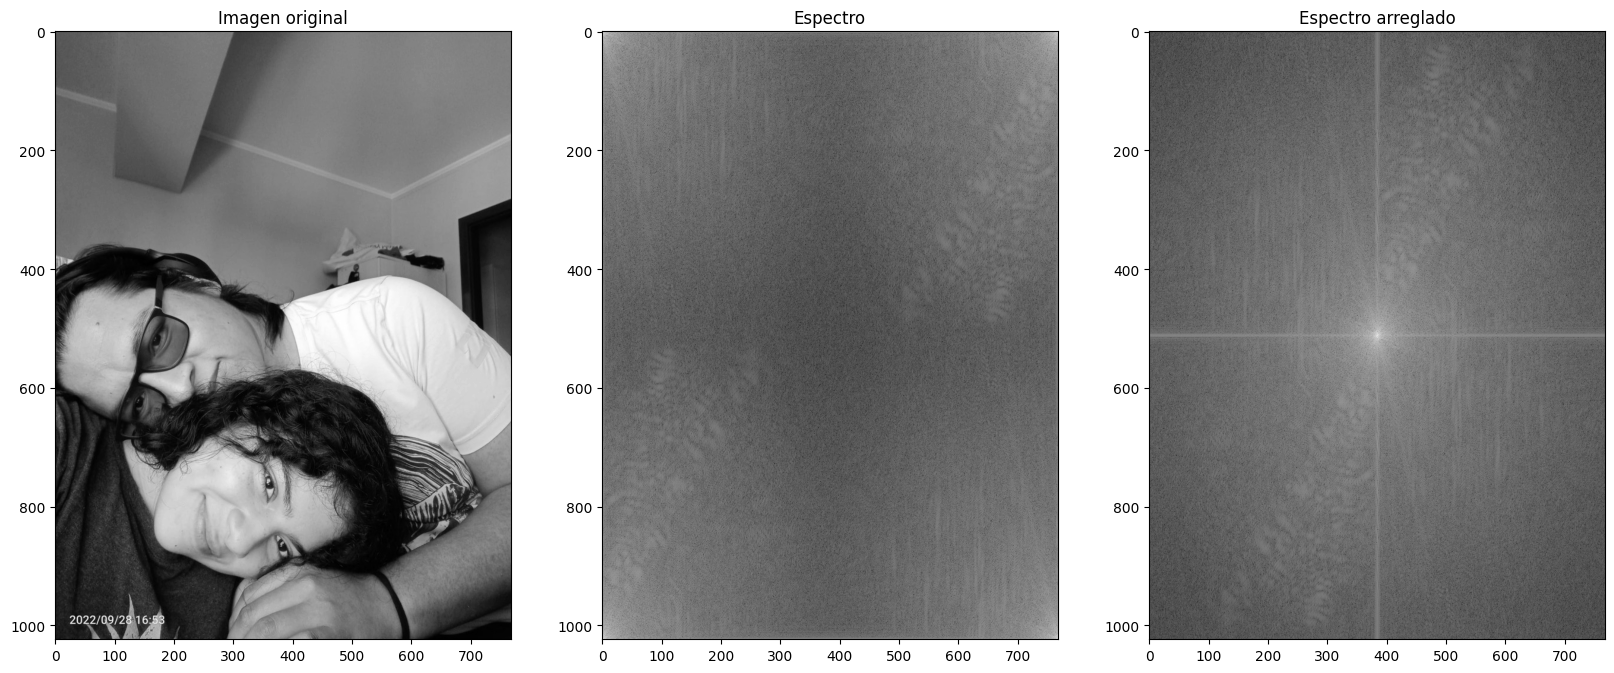

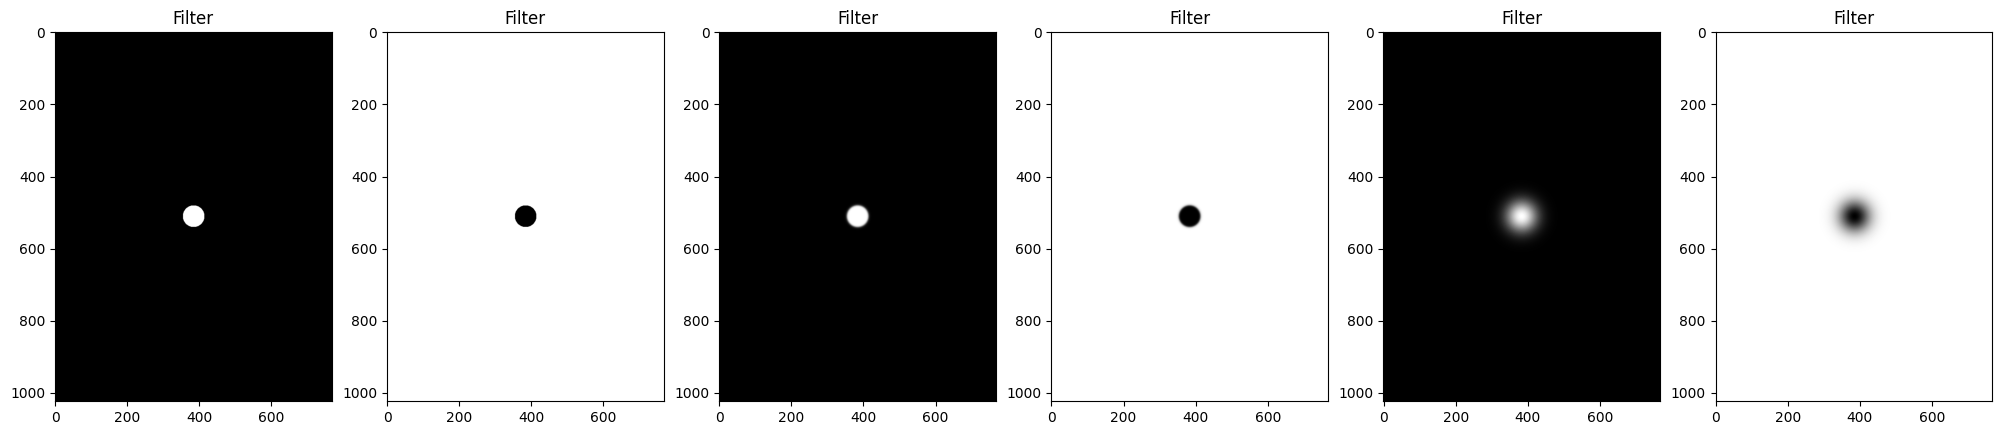

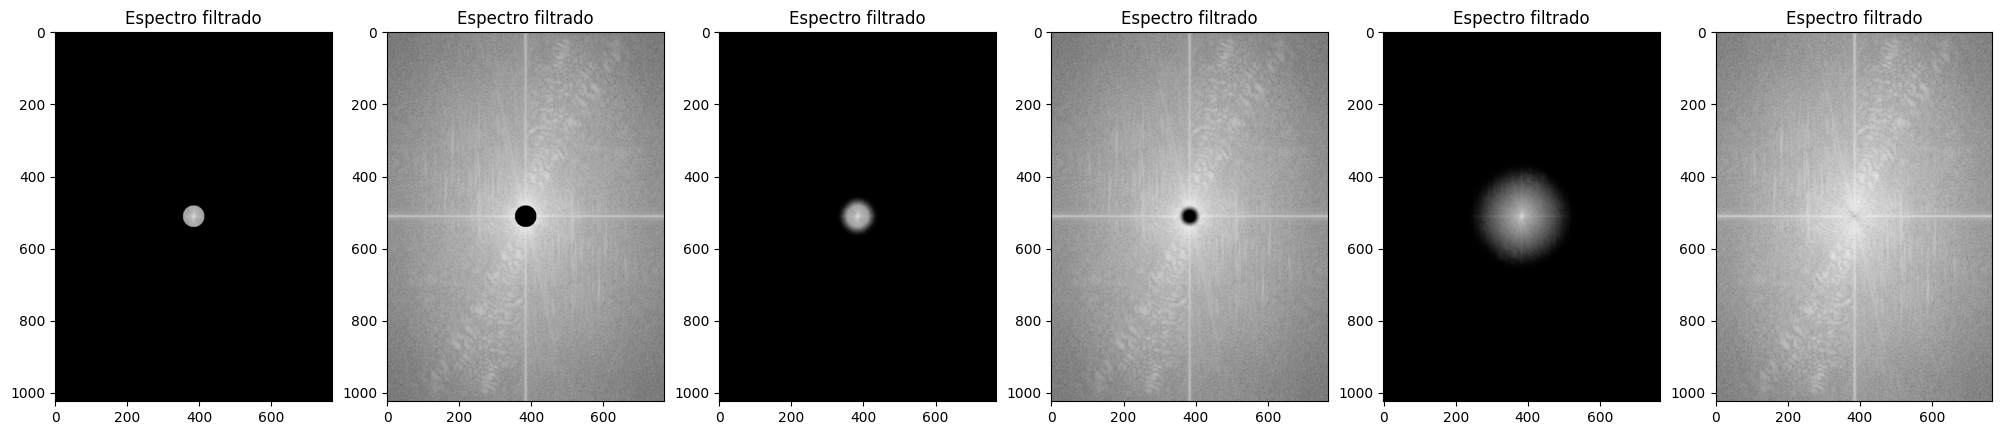

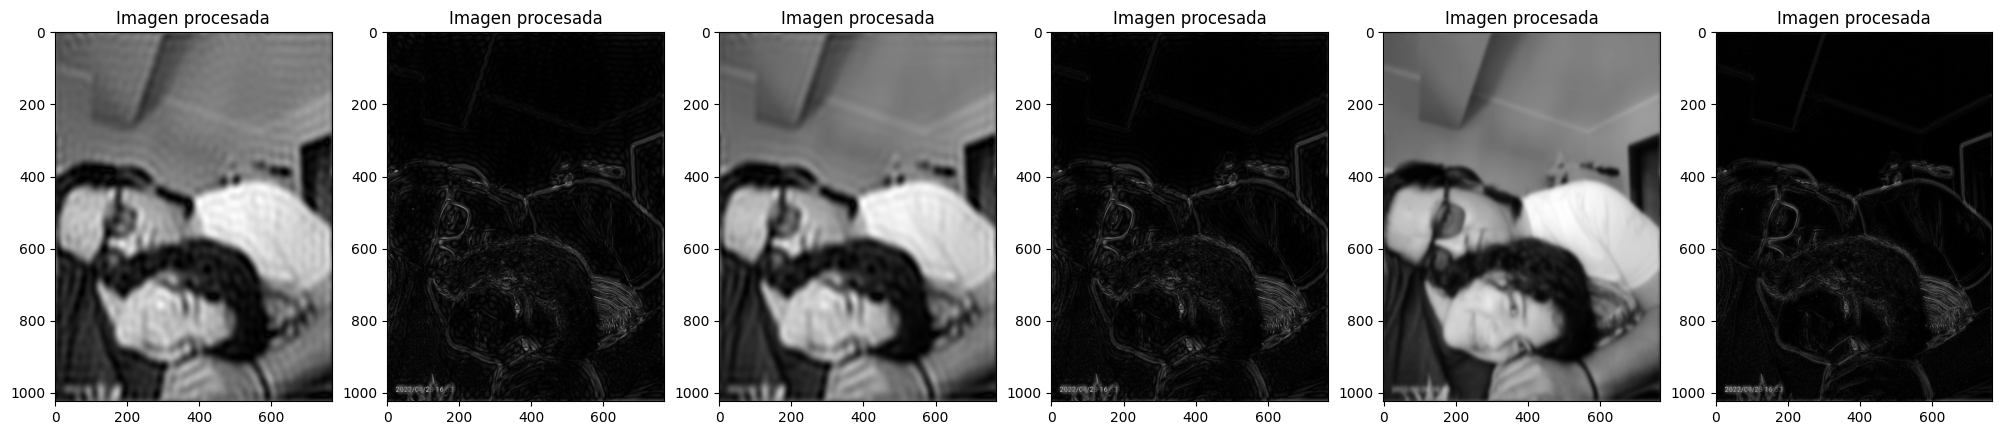

In [15]:
plt.figure(figsize=(20,8))
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Imagen original")
plt.subplot(132), plt.imshow(np.log(1+np.abs(img_ft)), "gray"), plt.title("Espectro")
plt.subplot(133), plt.imshow(np.log(1+np.abs(img_ft_c)), "gray"), plt.title("Espectro arreglado")
plt.show()

plt.figure(figsize=(25,10))
plt.subplot(161), plt.imshow(I_LP, "gray"), plt.title("Filter")
plt.subplot(162), plt.imshow(I_HP, "gray"), plt.title("Filter")
plt.subplot(163), plt.imshow(BW_LP, "gray"), plt.title("Filter")
plt.subplot(164), plt.imshow(BW_HP, "gray"), plt.title("Filter")
plt.subplot(165), plt.imshow(G_LP, "gray"), plt.title("Filter")
plt.subplot(166), plt.imshow(G_HP, "gray"), plt.title("Filter")
plt.show()

plt.figure(figsize=(25,10))
plt.subplot(161), plt.imshow(np.log(1+np.abs(img_I_LP_ft_c)), "gray"), plt.title("Espectro filtrado")
plt.subplot(162), plt.imshow(np.log(1+np.abs(img_I_HP_ft_c)), "gray"), plt.title("Espectro filtrado")
plt.subplot(163), plt.imshow(np.log(1+np.abs(img_BW_LP_ft_c)), "gray"), plt.title("Espectro filtrado")
plt.subplot(164), plt.imshow(np.log(1+np.abs(img_BW_HP_ft_c)), "gray"), plt.title("Espectro filtrado")
plt.subplot(165), plt.imshow(np.log(1+np.abs(img_G_LP_ft_c)), "gray"), plt.title("Espectro filtrado")
plt.subplot(166), plt.imshow(np.log(1+np.abs(img_G_HP_ft_c)), "gray"), plt.title("Espectro filtrado")
plt.show()

plt.figure(figsize=(25,10))
plt.subplot(161), plt.imshow(np.abs(img_I_LP), "gray"), plt.title("Imagen procesada")
plt.subplot(162), plt.imshow(np.abs(img_I_HP), "gray"), plt.title("Imagen procesada")
plt.subplot(163), plt.imshow(np.abs(img_BW_LP), "gray"), plt.title("Imagen procesada")
plt.subplot(164), plt.imshow(np.abs(img_BW_HP), "gray"), plt.title("Imagen procesada")
plt.subplot(165), plt.imshow(np.abs(img_G_LP), "gray"), plt.title("Imagen procesada")
plt.subplot(166), plt.imshow(np.abs(img_G_HP), "gray"), plt.title("Imagen procesada")
plt.show()